In [6]:
# Importing Libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Tickers to work with: (GOOGL, Google) (AMZN, Amazon) (JPM, JPMorgan and Chase) (AAPL, Apple)
tickers = ["GOOGL", "JPM", "AAPL", "AMZN"]

# Define date ragnge: last 3 years
start_date = "2022-01-01"
end_date = "2025-06-09"

# Download data
data = yf.download(tickers, start=start_date, end=end_date, group_by="tickers", auto_adjust=True)

[*********************100%***********************]  4 of 4 completed


In [8]:
# Saving data locally, save each ticker's DataFrame to a CSV 
for tkr in tickers:
    #Get DataFrame for that ticker
    df = data[tkr].reset_index()
    df.to_csv(f"{tkr}_hist.csv", index=False)

In [9]:
# Loading and inspecting data
aapl = pd.read_csv("AAPL_hist.csv", parse_dates=["Date"])
aapl.head() # View first 5 rows
aapl.info() # See columns and dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    860 non-null    datetime64[ns]
 1   Open    860 non-null    float64       
 2   High    860 non-null    float64       
 3   Low     860 non-null    float64       
 4   Close   860 non-null    float64       
 5   Volume  860 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 40.4 KB


In [10]:
# Check for missing values
aapl.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [11]:
# See mean/median/quantiles for price and volume
aapl.describe()

,Date,Open,High,Low,Close,Volume
count,860,860.000000,860.000000,860.000000,860.000000,8.600000e+02
mean,2023-09-19 04:34:36.279069696,181.587299,183.615947,179.752134,181.791636,6.682906e+07
min,2022-01-03 00:00:00,124.398597,126.136083,122.582119,123.421249,2.323470e+07
25%,2022-11-08 18:00:00,157.588395,160.169879,155.658161,157.267822,4.767982e+07
50%,2023-09-19 12:00:00,175.507199,177.529335,174.165622,175.901993,6.010800e+07
75%,2024-07-29 06:00:00,205.385669,208.491629,202.062504,206.205635,7.880372e+07
max,2025-06-06 00:00:00,257.568678,259.474086,257.010028,258.396667,3.186799e+08
std,NaN,31.504288,31.628230,31.361326,31.552338,2.823134e+07


# Plotting the Closing Price Over Time


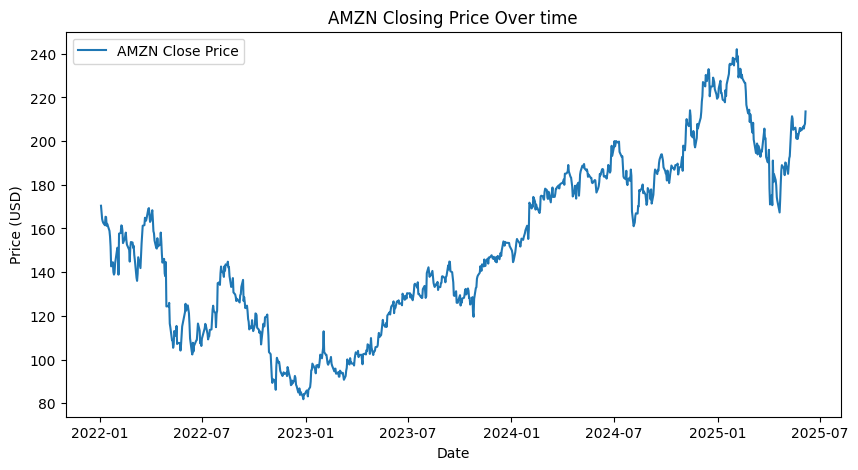

In [12]:
amzn = pd.read_csv("AMZN_hist.csv", parse_dates=["Date"])
plt.figure(figsize=(10, 5))
plt.plot(amzn["Date"], amzn["Close"], label="AMZN Close Price")
plt.title("AMZN Closing Price Over time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

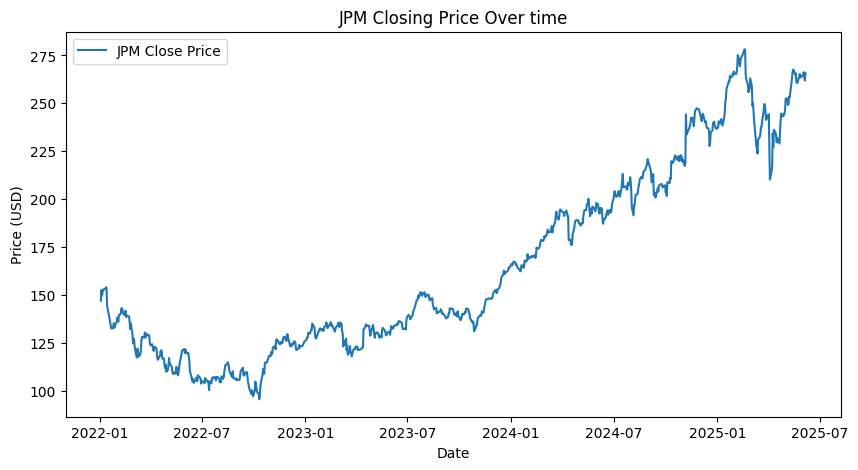

In [13]:
jpm = pd.read_csv("JPM_hist.csv", parse_dates=["Date"])
plt.figure(figsize=(10, 5))
plt.plot(jpm["Date"], jpm["Close"], label="JPM Close Price")
plt.title("JPM Closing Price Over time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

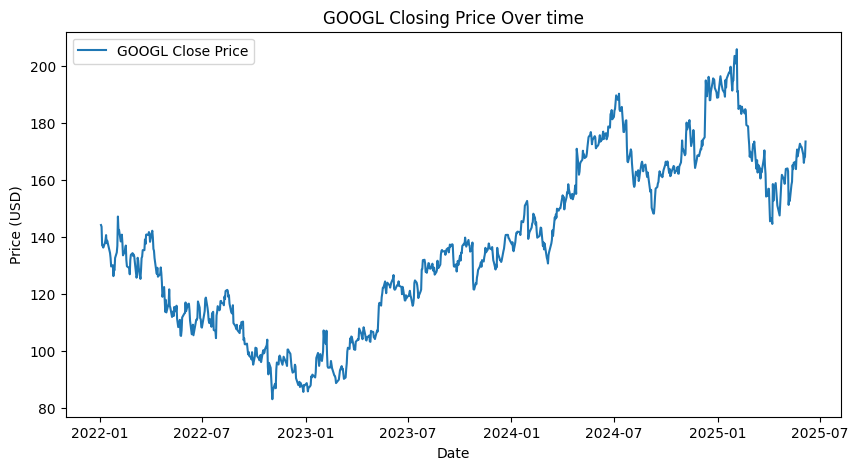

In [14]:
googl = pd.read_csv("GOOGL_hist.csv", parse_dates=["Date"])
plt.figure(figsize=(10, 5))
plt.plot(googl["Date"], googl["Close"], label="GOOGL Close Price")
plt.title("GOOGL Closing Price Over time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

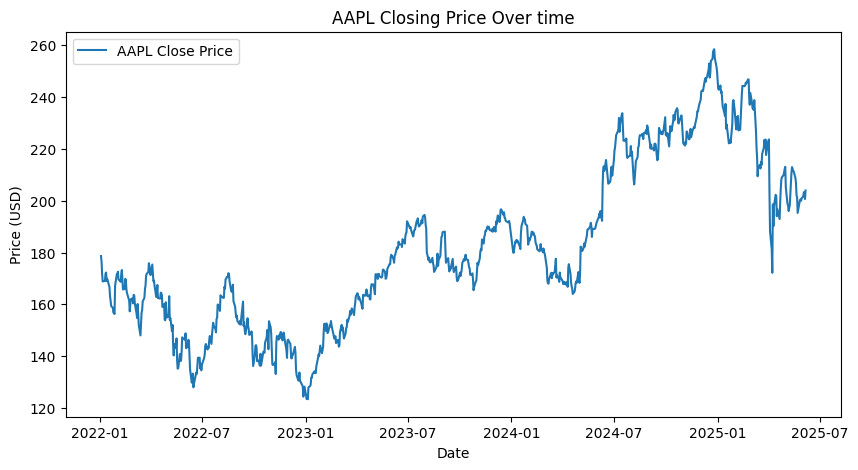

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(aapl["Date"], aapl["Close"], label="AAPL Close Price")
plt.title("AAPL Closing Price Over time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Simple Analysis & Predictive Component


In [16]:
# Compute moving averages
aapl["MA20"] = aapl["Close"].rolling(window=20).mean()
aapl["MA50"] = aapl["Close"].rolling(window=50).mean()

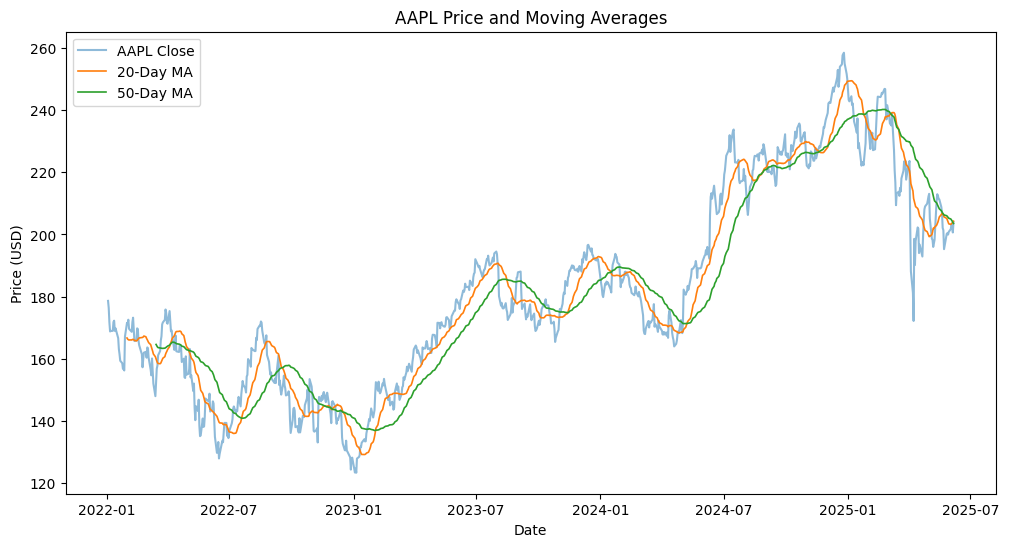

In [17]:
# Plot closing price with moving average
plt.figure(figsize=(12, 6))
plt.plot(aapl["Date"], aapl["Close"], label="AAPL Close", alpha=0.5)
plt.plot(aapl["Date"], aapl["MA20"], label="20-Day MA", linewidth=1.2)
plt.plot(aapl["Date"], aapl["MA50"], label="50-Day MA", linewidth=1.2)
plt.title("AAPL Price and Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()
# See how MA20 & MA50 track and lag the price

In [18]:
# Generate signals
# Buy when MA20 crosses above MA50
# Sell when MA20 crosses below MA50
aapl["Signal"] = 0 # default no position
aapl.loc[aapl["MA20"] > aapl["MA50"], "Signal"] = 1
aapl.loc[aapl["MA20"] < aapl["MA50"], "Signal"] = 1

In [19]:
# Isolate the dates when the crossover occurs by checking where Signal changes
aapl["Trade"] = aapl["Signal"].diff()
buy_signal = aapl.loc[aapl["Trade"] == 2]
sell_signal = aapl.loc[aapl["Trade"] == -2]

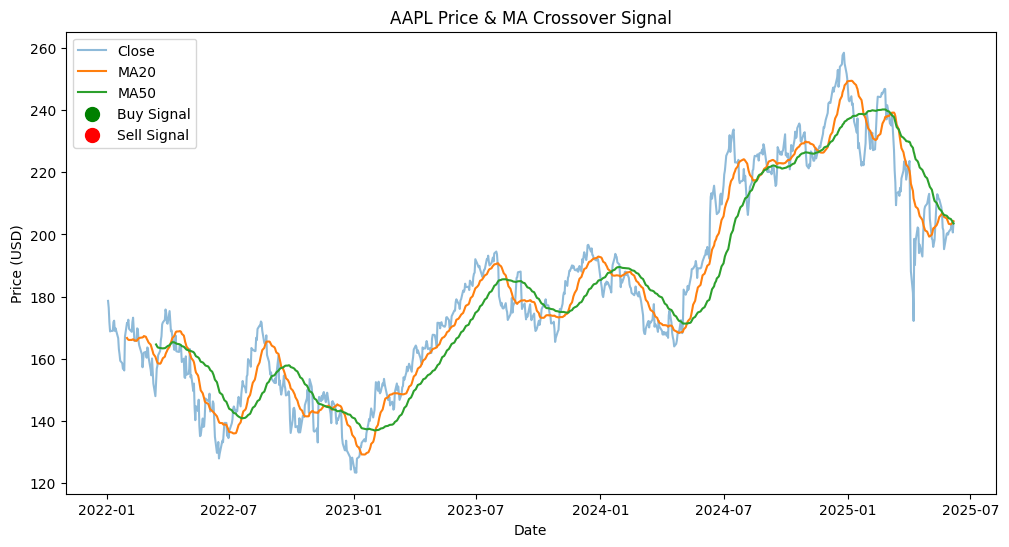

In [20]:
# Plot buy/sell markers on the chart
plt.figure(figsize=(12, 6))
plt.plot(aapl["Date"], aapl["Close"], label="Close", alpha=0.5)
plt.plot(aapl["Date"], aapl["MA20"], label="MA20")
plt.plot(aapl["Date"], aapl["MA50"], label="MA50")

# Plot buy signals
plt.scatter(buy_signal["Date"], buy_signal["Close"], color="green", label="Buy Signal", s=100)

# Plot sell signals
plt.scatter(sell_signal["Date"], sell_signal["Close"], color="red", label="Sell Signal", s=100)
plt.title("AAPL Price & MA Crossover Signal")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()